In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
xls = pd.ExcelFile('../data/WorldEnergyBalancesHighlights_final.xlsx')

In [3]:
df = pd.read_excel(xls, 'TimeSeries_1971-2019',header=1,index_col=[0,1,2],usecols="A:C,Z:BB",na_values=['..','c'])
df

1990  \
Country                                 Product                  Flow                                                    
Australia                               Coal, peat and oil shale Production (ktoe)                        1.061030e+05   
                                                                 Imports (ktoe)                           0.000000e+00   
                                                                 Exports (ktoe)                          -6.726662e+04   
                                                                 Total energy supply (ktoe)               3.488774e+04   
                                                                 Electricity, CHP and heat plants (ktoe) -2.892349e+04   
...                                                                                                                ...   
IEA and Accession/Association countries Total                    Electricity output (GWh)                 9.046845e+06   
World                                   Fossil fuels             Electricity output (GWh)                 7.501510e+06   
                                        Nuclear                  Electricity output (GWh)                 2.012902e+06   
                                        Renewable sources        Electricity output (GWh)                 2.296008e+06   
                                        Total                    Electricity output (GWh)                 1.184619e+07   

                                                                                                                  1991  \
Country                                 Product                  Flow                                                    
Australia                               Coal, peat and oil shale Production (ktoe)                        1.147629e+05   
                                                                 Imports (ktoe)                           0.000000e+00   
                                                                 Exports (ktoe)                          -7.821431e+04   
                                                                 Total energy supply (ktoe)               3.627799e+04   
                                                                 Electricity, CHP and heat plants (ktoe) -2.994731e+04   
...                                                                                                                ...   
IEA and Accession/Association countries Total                    Electricity output (GWh)                 9.328546e+06   
World                                   Fossil fuels             Electricity output (GWh)                 7.635090e+06   
                                        Nuclear                  Electricity output (GWh)                 2.105787e+06   
                                        Renewable sources        Electricity output (GWh)                 2.331754e+06   
                                        Total                    Electricity output (GWh)                 1.211372e+07   

                                                                                                                  1992  \
Country                                 Product                  Flow                                                    
Australia                               Coal, peat and oil shale Production (ktoe)                        1.191394e+05   
                                                                 Imports (ktoe)                           0.000000e+00   
                                                                 Exports (ktoe)                          -8.201214e+04   
                                                                 Total energy supply (ktoe)               3.683188e+04   
                                                                 Electricity, CHP and heat plants (ktoe) -3.072018e+04   
...                                                                                   

In [4]:
countries = [
"Australia",
"Austria",
"Belgium",
"Canada",
"Chile",
"Czech Republic",
"Denmark",
"Estonia",
"Finland",
"France",
"Germany",
"Greece",
"Hungary",
"Iceland",
"Ireland",
"Israel",
"Italy",
"Japan",
"Korea",
"Latvia",
"Lithuania",
"Luxembourg",
"Mexico",
"Netherlands",
"New Zealand",
"Norway",
"Poland",
"Portugal",
"Slovak Republic",
"Slovenia",
"Spain",
"Sweden",
"Switzerland",
"Turkey",
"United Kingdom",
"United States",
"Brazil",
"People's Republic of China",
"India",
"Indonesia",
"Morocco",
"Singapore",
"South Africa",
"Thailand"]

In [5]:
#primeiro parametro é o dataframe onde o kmeans vai ser utilizado
#segundo parametro é o numero de clusters que o kmeans vai gerar
#terceiro parametro são os labels que serão comparados
def applyKmeans(dataf, n_clusters, compare):
    data = dataf.copy()
    #aplicando o kmeans
    kmeans = KMeans(n_clusters=n_clusters).fit(data)
    #plotando o grafico
    sns.scatterplot(x=data[compare[0]], y=data[compare[1]], hue=kmeans.labels_, s=100)
    plt.title('Classificação K-Means')
    #adicionando as predições em uma coluna do dataframe
    data['predictions'] = kmeans.labels_
    #retorna um novo dataframe com as predições
    return data

In [6]:
#primeiro parametro é o dataframe a ser usado para retirar as informações
#segundo é uma lista de paises para comparação
#terceiro parametro são os labels que serão comparados
#quarto parametro é o index que será acessado para reirada dos dados
def createDF(df, countries, compare, ind):
    index = []
    rw = []
    fs = []
    #para cada país
    for c in countries:
        #loc é um dataframe com dados apenas daquele pais
        loc = df.loc[(c)]
        compare1 = loc.loc[(compare[0])]
        compare2 = loc.loc[(compare[1])]
        #insere os dados em duas listas separadas
        rw.append(compare1.transpose()[ind].mean())
        fs.append(compare2.transpose()[ind].mean())
    d  = {compare[0] : rw, compare[1]: fs}
    #cria um novo dataframe e o retorna
    new_df = pd.DataFrame(data = d, index = countries)
    return new_df

In [7]:
data_output = createDF(df, countries, ['Renewable sources', 'Fossil fuels'], 'Electricity output (GWh)')
data_gas_consuption = createDF(df, countries, ['Renewables and waste', 'Natural gas'], 'Total final consumption (ktoe)')
data_oil_consuption = createDF(df, countries, ['Renewables and waste', 'Oil products'], 'Total final consumption (ktoe)')

# Produção

## Fontes renováveis X Combustíveis fosséis
### Foram gerados 4 clusters com características diferentes:
#### - label 0: Países que produzem mais combustíveis fosséis em comparação com fontes renováveis de energia (ex: Marrocco e Singapura)
#### - label 1: Países que produzem moderadamente combustíveis fosséis e fontes renováveis de energia (ex: Chile, Austrália e Austria)
#### - label 2: Países que produzem mais energias de fontes renováveis em comparação com combustíveis fosséis (ex: Noruega e Suécia)
#### - label 3: Países que são potências na produção de energia no total, tanto fosséis quanto renováveis (ex: China, Brasil e Estados Unidos)

,Renewable sources,Fossil fuels,predictions
Australia,10.027351,12.181744,1
Austria,10.652642,9.758666,1
Belgium,8.494475,10.321815,1
Canada,12.821669,11.831855,3
Chile,10.092084,10.149921,1
Czech Republic,8.381801,10.819681,1
Denmark,9.110077,10.212675,1
Estonia,6.213711,9.242491,0
Finland,10.059020,10.124841,1
France,11.223350,10.812888,1


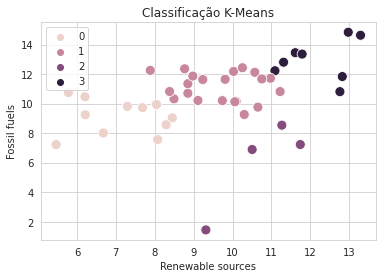

In [20]:
data_output_log = np.log(data_output)
predicted_output = applyKmeans(data_output_log, 4, ['Renewable sources', 'Fossil fuels'])
predicted_output

# Consumo Total

## Fontes renováveis X Gás natural
### Foram gerados 4 clusters com características diferentes:
#### - label 0: Países que consumem moderadamente energia de fontes renováveis e gás natural (ex: Chile, Finlandia e Isreal)
#### - label 1: Países que mais gás natural em comparação à energias renováveis (ex: Austrália, Austria e Belgica)
#### - label 2: Países que consumem muita energia de fontes renováveis e gás natural (ex: China, Brasil, Estados Unidos)
#### - label 3: Países que consumem pouca energia de fontes renováveis e gás natural (ex: Singapura e Luxemburgo)

,Renewables and waste,Natural gas,predictions
Australia,8.297566,9.355381,1
Austria,8.061619,8.391206,1
Belgium,6.904389,9.173405,1
Canada,9.330392,10.783213,2
Chile,8.285310,7.586933,0
Czech Republic,7.550139,8.621446,1
Denmark,6.876334,7.374223,0
Estonia,6.046893,5.683621,0
Finland,8.427003,6.793488,0
France,9.258444,10.330173,2


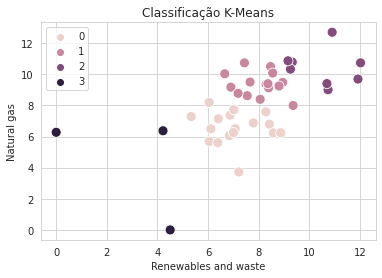

In [16]:
data_gas_consuption_log = np.log(data_gas_consuption)
data_gas_consuption_log = data_gas_consuption_log.replace(-np.inf, 0)
predicted_gas = applyKmeans(data_gas_consuption_log, 4, ['Renewables and waste', 'Natural gas'])
predicted_gas

# Consumo Total

## Fontes renováveis X Derivados do petróleo
### Foram gerados 4 clusters com características diferentes:
#### - label 0: País que não consome energias renovavéis (Singapura)
#### - label 1: Países que consumem moderadamente energia de fontes renováveis e derivados do petróleo (ex: Austrália, Austria e Belgica)
#### - label 2: Países que consumem mais energias de fontes renováveis que derivados do petróleo (ex: Luxemburgo, Irlanda, Israel)
#### - label 3: Países que consumem muita energia de fontes renováveis e derivados do petróleo (ex: China, Brasil, Estados Unidos)

,Renewables and waste,Oil products,predictions
Australia,8.297566,10.501829,1
Austria,8.061619,9.278658,1
Belgium,6.904389,9.912583,1
Canada,9.330392,11.308751,3
Chile,8.285310,9.247689,1
Czech Republic,7.550139,8.999957,1
Denmark,6.876334,8.763391,1
Estonia,6.046893,6.938328,2
Finland,8.427003,9.020735,1
France,9.258444,11.243898,3


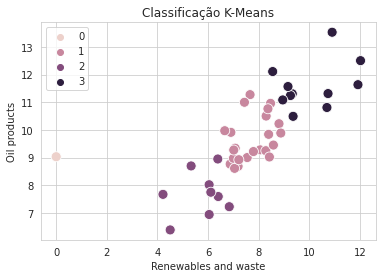

In [21]:
data_oil_consuption_log = np.log(data_oil_consuption)
data_oil_consuption_log = data_oil_consuption_log.replace(-np.inf, 0)
predicted_oil = applyKmeans(data_oil_consuption_log, 4, ['Renewables and waste', 'Oil products'])
predicted_oil